## Import Libraries & Load Dataset

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , GRU
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

## UBER Dataset

In [2]:
data = pd.read_csv("UBER.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [3]:
data = data[["Date","Close"]]
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Close
0,2019-05-10,41.570000
1,2019-05-13,37.099998
2,2019-05-14,39.959999
3,2019-05-15,41.290001
4,2019-05-16,43.000000


<AxesSubplot:xlabel='Date', ylabel='Price'>

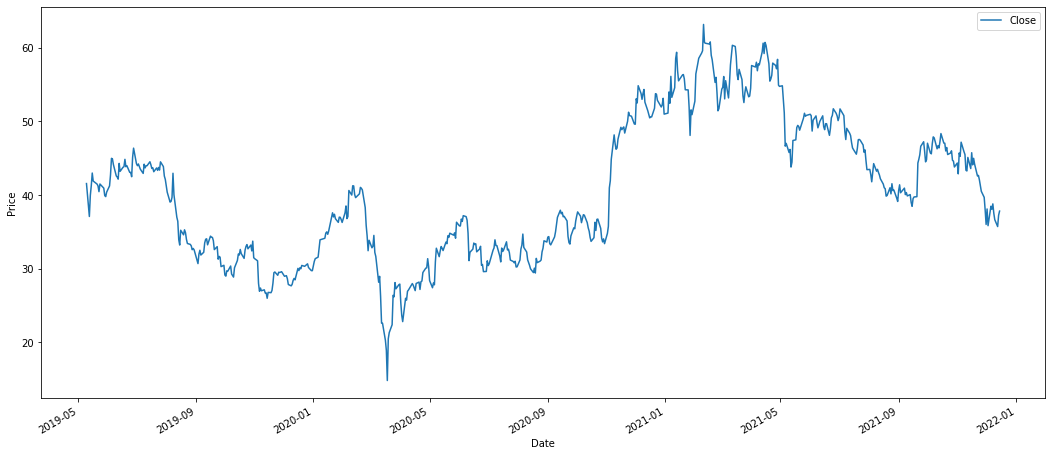

In [4]:
data.set_index("Date").plot(figsize=(18,8),xlabel="Date",ylabel="Price")

# Preprocessing

In [5]:
X = data[["Close"]]
Train , Test = X[:600],X[600:]

## Scaling
### StandardScaler

In [6]:
scale = StandardScaler()
Train = scale.fit_transform(Train)
Test = scale.transform(Test)
with open("StandardScaler","wb") as f:
    pickle.dump(scale,f)

In [7]:
X_Train,Y_Train = [],[]
for i in range(len(Train)-5):
    X_Train.append(Train[i:i+5])
    Y_Train.append(Train[i+5])
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

In [8]:
X_Test,Y_Test = [],[]
for i in range(len(Test)-5):
    X_Test.append(Test[i:i+5])
    Y_Test.append(Test[i+5])
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)

# Model
## Recurrent Neural Network

## GRU

In [9]:
model = Sequential()
model.add(GRU(64,input_shape=(X_Train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(1))

In [10]:
model.compile(optimizer="adam",loss="mean_absolute_error")
checkpoint = ModelCheckpoint("Uber.h5",monitor="val_loss",mode="min",save_best_only=True)

In [11]:
history = model.fit(X_Train,Y_Train,epochs=50,batch_size=20,validation_data=(X_Test,Y_Test),callbacks=[checkpoint])

Epoch 1/50
30/30 [==============================] - 7s 58ms/step - loss: 0.4037 - val_loss: 0.1437
Epoch 2/50
30/30 [==============================] - 0s 11ms/step - loss: 0.2057 - val_loss: 0.1587
Epoch 3/50
30/30 [==============================] - 0s 13ms/step - loss: 0.1993 - val_loss: 0.1714
Epoch 4/50
30/30 [==============================] - 0s 14ms/step - loss: 0.2012 - val_loss: 0.1404
Epoch 5/50
30/30 [==============================] - 0s 13ms/step - loss: 0.1906 - val_loss: 0.1707
Epoch 6/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1930 - val_loss: 0.1428
Epoch 7/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1822 - val_loss: 0.1241
Epoch 8/50
30/30 [==============================] - 0s 13ms/step - loss: 0.1891 - val_loss: 0.1345
Epoch 9/50
30/30 [==============================] - 0s 12ms/step - loss: 0.1752 - val_loss: 0.1227
Epoch 10/50
30/30 [==============================] - 0s 14ms/step - loss: 0.1671 - val_loss: 0.1157
Epoch 11/

# Predict

In [12]:
pred_train = model.predict(X_Train)
pred_test = model.predict(X_Test)
pred_train = scale.inverse_transform(pred_train)
pred_test = scale.inverse_transform(pred_test)
pred = np.concatenate([pred_train,pred_test],axis=0)

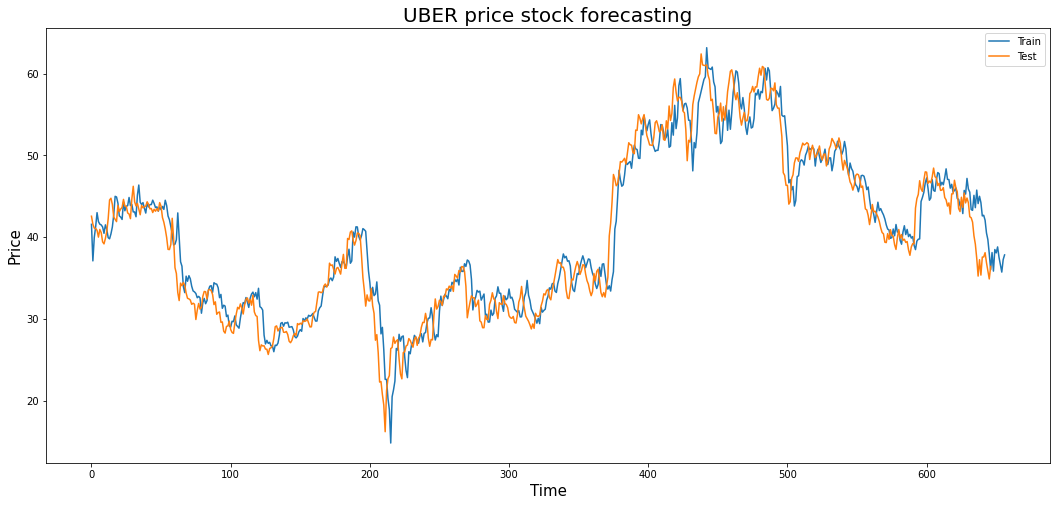

In [14]:
plt.figure(figsize=(18,8))
plt.plot(X,label="Train")
plt.plot(pred,label="Test")
plt.xlabel("Time",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("UBER price stock forecasting",fontsize=20)
plt.legend()